In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\Carboplatin_metabolic_NCI.csv')
data.head(2)

,Cell Line,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,...,O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Cell names,Carboplatin
0,Breast_BT549,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,...,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,BT549,BR:BT-549,0.611724
1,Breast_HS578T,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,...,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,HS578T,BR:HS 578T,0.705000


In [3]:
drug = data.pop('Carboplatin')
drug.head()

0    0.611724
1    0.705000
2    0.621552
3    0.620690
4    3.566724
Name: Carboplatin, dtype: float64

In [4]:
X = data.select_dtypes('float64')
X.head(2)

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.071269,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,0.011203,...,0.059958,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154


In [5]:
X.fillna(0.0, inplace=True)

In [6]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [7]:
labels = []
drug_mean = drug.mean()
for i in drug:
    if i >= drug_mean:
        labels.append('N')
    else:
        labels.append('R')
y = pd.Series(labels)

In [8]:
drug_mean

2.9686206896551717

In [9]:
data['Cell Line'].head(49)

0          Breast_BT549
1         Breast_HS578T
2       Breast_MDAMB231
3           Breast_T47D
4             CNS_SF268
5             CNS_SF295
6             CNS_SF539
7             CNS_SNB19
8             CNS_SNB75
9              CNS_U251
10        Colon_COLO205
11        Colon_HCC2998
12         Colon_HCT116
13          Colon_HCT15
14           Colon_HT29
15           Colon_KM12
16          Colon_SW620
17            Lung_EKVX
18           Lung_HOP62
19           Lung_HOP92
20         Lung_NCIH226
21          Lung_NCIH23
22        Lung_NCIH322M
23         Lung_NCIH460
24         Lung_NCIH522
25     Melanoma_LOXIMVI
26         Melanoma_M14
27     Melanoma_MALME3M
28    Melanoma_MDAMB435
29      Melanoma_SKMEL2
30     Melanoma_SKMEL28
31      Melanoma_SKMEL5
32     Melanoma_UACC257
33      Melanoma_UACC62
34       Ovarian_IGROV1
35       Ovarian_OVCAR3
36       Ovarian_OVCAR4
37       Ovarian_OVCAR5
38       Ovarian_OVCAR8
39        Ovarian_SKOV3
40       Prostate_DU145
41         Prost

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,y = smote.fit_resample(X,y)

y.value_counts()

1    38
0    38
dtype: int64

In [12]:
'''

from xgboost import plot_importance
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

'''

'\n\nfrom xgboost import plot_importance\nfrom sklearn.model_selection import train_test_split\n\nmodel = RandomForestClassifier(class_weight = \'balanced\', n_estimators = 150, random_state = 43)\nmodel.fit(X, y)\nimportances = model.feature_importances_\nindices = np.argsort(importances)[::-1]\n\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(X.shape[1]), importances[indices],\n        color="lightsalmon", align="center")\nplt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)\nplt.xlim([-1, X.shape[1]])\nplt.show()\n\n'

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#sfm = SelectFromModel(model, threshold = 0.006)
#sfm.fit(X,y)

#X = pd.DataFrame(data = sfm.transform(X), columns = X.columns[sfm.get_support(1)])

indices = X.index.values


X_train, X_test, train_index, test_index = train_test_split(X,indices, test_size = 0.33, random_state = 43)
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)

rfecv = RFECV(model, min_features_to_select = 1, step = 1, cv = StratifiedKFold(5), scoring = 'precision')
#model.fit(X_train, y_train)

rfecv.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select = rfecv.n_features_, step = 1)
rfe.fit(X_train, y_train)

prediction = rfe.predict_proba(X_test)[:, 1]
y_pred = rfe.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, rfe.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, rfe.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.7307692307692307
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       1.00      0.46      0.63        13

    accuracy                           0.73        26
   macro avg       0.82      0.73      0.71        26
weighted avg       0.83      0.73      0.71        26



Text(50.722222222222214, 0.5, 'True Labels')

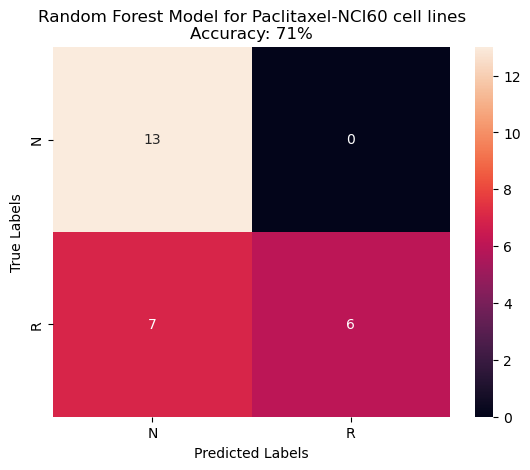

In [14]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('Random Forest Model for Paclitaxel-NCI60 cell lines\nAccuracy: 71%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

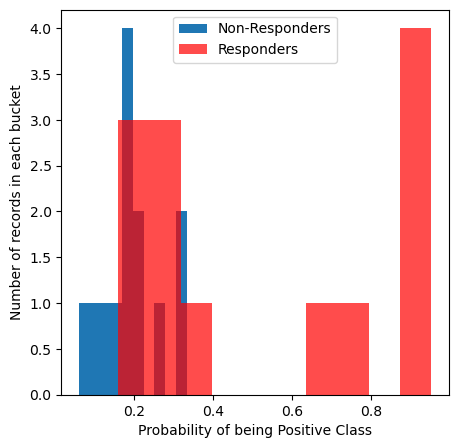

In [15]:
plt.figure(figsize=(5, 5))
plt.hist(prediction[y_test==0], label='Non-Responders')
plt.hist(prediction[y_test==1], label='Responders', alpha=0.7, color = 'r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [16]:
responders = prediction[y_test == 1]
count = 0
for i in responders: 
    if i >= max(prediction[y_test==0]):
        count+=1
count, count/len(responders)

(7, 0.5384615384615384)

In [17]:
#df_rf_test = X_test.copy()
#df_rf_test['test_proba'] = model.predict_proba(X_test)[:, 1]

#df_rf_train = X_train.copy()
#df_rf_train['train_proba'] = model.predict_proba(X_train)[:, 1]

#df_rf = pd.concat([X_train, df_rf_test], sort=True).sort_index()

df_rf_test = X_test.copy()
df_rf_test.loc[test_index, 'test_proba'] = prediction
df_rf_test.loc[test_index, 'target'] = y_test
df1 = pd.concat([X_train, df_rf_test], sort=False).sort_index()

In [18]:
df1

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,0.720000,1.0
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,0.000000,0.005778,0.003199,0.011203,...,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,NaN,NaN
2,0.030946,0.006278,3.830076,0.384303,0.027088,0.065463,0.002946,0.009472,0.002344,0.010895,...,0.026098,0.029986,0.025863,0.053371,0.038207,0.023270,0.030655,0.040250,NaN,NaN
3,0.008574,0.005661,0.296663,0.035179,0.005575,0.026321,0.001608,0.020112,0.003865,0.016057,...,0.032452,0.034177,0.022305,0.080242,0.029226,0.019556,0.033062,0.040780,NaN,NaN
4,0.012726,0.003326,0.000000,0.000000,0.005354,0.037794,0.002402,0.013558,0.003402,0.013344,...,0.027523,0.018876,0.016423,0.057103,0.022155,0.011501,0.014310,0.034584,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.032362,0.005592,2.670617,0.269551,0.027253,0.103950,0.004158,0.008396,0.002590,0.009368,...,0.026029,0.042750,0.031345,0.077091,0.038082,0.024649,0.044067,0.041772,0.353333,1.0
72,0.031086,0.015994,1.580547,0.164576,0.020787,0.085549,0.002528,0.008915,0.002658,0.015613,...,0.028322,0.028475,0.022138,0.065484,0.051968,0.024871,0.029559,0.051033,NaN,NaN
73,0.023158,0.007879,1.995583,0.200779,0.019913,0.065697,0.002482,0.009808,0.003643,0.026763,...,0.035897,0.042842,0.029793,0.061091,0.039966,0.027440,0.040900,0.047598,0.900000,1.0
74,0.027178,0.006869,3.164948,0.317127,0.023938,0.067261,0.002744,0.009424,0.002505,0.018079,...,0.031415,0.037467,0.028147,0.056652,0.039215,0.025385,0.036896,0.044464,NaN,NaN


In [19]:
df1_main = df1.iloc[:49, ]
x = max(prediction[y_test == 0])
df1_main = df1_main.loc[(df1_main['test_proba'] > x)]
df1_main.shape

(2, 2183)

In [50]:
df1_main.head()

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.02930,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,0.720000,1.0
41,0.023178,0.007496,2.458752,0.245802,0.020593,0.069170,0.002531,0.009372,0.002677,0.025707,...,0.03706,0.045410,0.030573,0.060134,0.040286,0.027630,0.043522,0.048938,0.946667,1.0


In [21]:
model2 = SVC(kernel = 'linear', C=1, gamma='auto', probability=True)

rfecv2 = RFECV(model2, min_features_to_select = 1, scoring = 'precision', step = 1, cv = StratifiedKFold(5))
rfecv2.fit(X_train, y_train)

#model2.fit(X_train, y_train)

rfe2 = RFE(model2, n_features_to_select = rfecv2.n_features_, step = 1)
rfe2.fit(X_train, y_train)

prediction2 = rfe2.predict_proba(X_test)[:, 1]
y_pred = rfe2.predict(X_test)
print(f'Accuracy on training data: {accuracy_score(y_train, rfe2.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, rfe2.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.6153846153846154
              precision    recall  f1-score   support

           0       0.58      0.85      0.69        13
           1       0.71      0.38      0.50        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



Text(50.722222222222214, 0.5, 'True labels')

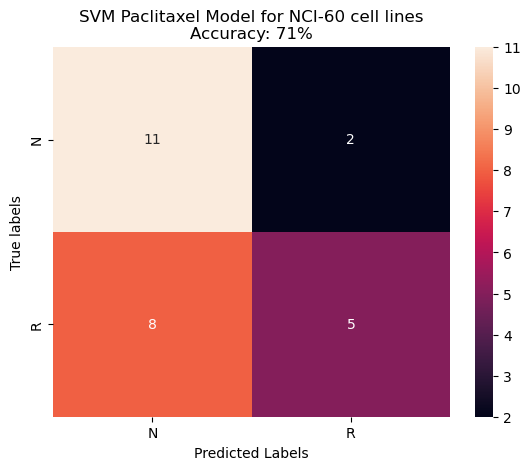

In [22]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('SVM Paclitaxel Model for NCI-60 cell lines\nAccuracy: 71%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True labels')

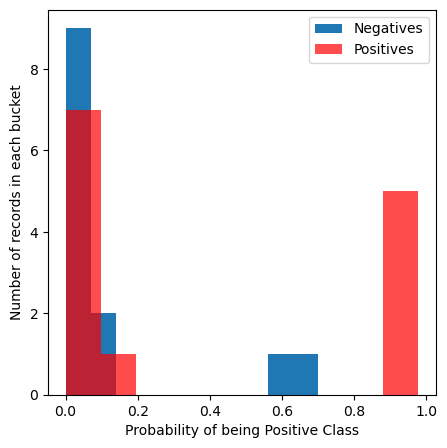

In [23]:
plt.figure(figsize=(5,5))
plt.hist(prediction2[y_test==0], label='Negatives')
plt.hist(prediction2[y_test==1], label='Positives', alpha=0.7, color = 'r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [24]:
resp_svm = prediction2[y_test == 1]
count = 0
for i in resp_svm:
    if i > max(prediction2[y_test == 0]):
        count+=1
count, count/len(resp_svm)

(5, 0.38461538461538464)

In [25]:
resp_svm

array([0.0569701 , 0.03388818, 0.90160911, 0.00119066, 0.00543814,
       0.89347059, 0.88935025, 0.15736351, 0.97741891, 0.88941548,
       0.00901731, 0.00131817, 0.00171554])

In [26]:
max(prediction2[y_test == 0])

0.701040802086456

In [27]:
df_svm_test = X_test.copy()
df_svm_test.loc[test_index, 'test_proba'] = prediction2
df_svm_test.loc[test_index, 'target'] = y_test
df2 = pd.concat([X_train, df_svm_test], sort=False).sort_index()

In [28]:
df2_main = df2.iloc[:49, ]
df2_main = df2_main.loc[(df2_main['test_proba'] > max(prediction2[y_test == 0]))]
df2_main

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.02930,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,0.901609,1.0
41,0.023178,0.007496,2.458752,0.245802,0.020593,0.069170,0.002531,0.009372,0.002677,0.025707,...,0.03706,0.045410,0.030573,0.060134,0.040286,0.027630,0.043522,0.048938,0.889415,1.0


In [32]:
model3 = XGBClassifier()
#model3.fit(X_train, y_train)

rfecv3 = RFECV(model3, min_features_to_select=1, step=1, scoring='precision', cv=StratifiedKFold(5))
rfecv3.fit(X_train, y_train)

#prediction3 = model3.predict_proba(X_test)[:, 1]

rfe3 = RFE(model3, n_features_to_select = rfecv3.n_features_, step = 1)
rfe3.fit(X_train, y_train)
prediction3 = rfe3.predict_proba(X_test)[:, 1]
y_pred = rfe3.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, rfe3.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.7307692307692307
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       1.00      0.46      0.63        13

    accuracy                           0.73        26
   macro avg       0.82      0.73      0.71        26
weighted avg       0.83      0.73      0.71        26



Text(50.722222222222214, 0.5, 'True Labels')

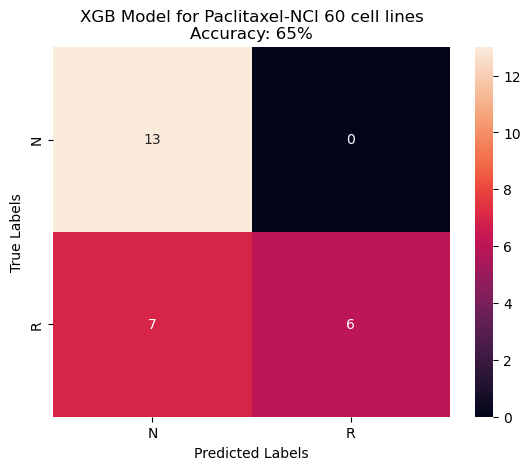

In [33]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('XGB Model for Paclitaxel-NCI 60 cell lines\nAccuracy: 65%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

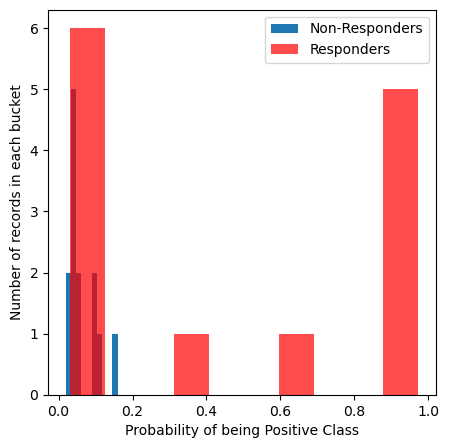

In [34]:
plt.figure(figsize=(5, 5))
plt.hist(prediction3[y_test==0], label='Non-Responders')
plt.hist(prediction3[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [35]:
resp_xg = prediction3[y_test == 1]
count = 0
for i in resp_xg:
    if i >= max(prediction3[y_test == 0]):
        count += 1
count, count/len(resp_xg)

(7, 0.5384615384615384)

In [36]:
df_xg = X_test.copy()
df_xg.loc[test_index, 'test_proba'] = prediction3
df_xg.loc[test_index, 'target'] = y_test
df3 = pd.concat([X_train, df_xg], sort=False).sort_index()
df3

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,0.338310,1.0
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,0.000000,0.005778,0.003199,0.011203,...,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,NaN,NaN
2,0.030946,0.006278,3.830076,0.384303,0.027088,0.065463,0.002946,0.009472,0.002344,0.010895,...,0.026098,0.029986,0.025863,0.053371,0.038207,0.023270,0.030655,0.040250,NaN,NaN
3,0.008574,0.005661,0.296663,0.035179,0.005575,0.026321,0.001608,0.020112,0.003865,0.016057,...,0.032452,0.034177,0.022305,0.080242,0.029226,0.019556,0.033062,0.040780,NaN,NaN
4,0.012726,0.003326,0.000000,0.000000,0.005354,0.037794,0.002402,0.013558,0.003402,0.013344,...,0.027523,0.018876,0.016423,0.057103,0.022155,0.011501,0.014310,0.034584,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.032362,0.005592,2.670617,0.269551,0.027253,0.103950,0.004158,0.008396,0.002590,0.009368,...,0.026029,0.042750,0.031345,0.077091,0.038082,0.024649,0.044067,0.041772,0.668531,1.0
72,0.031086,0.015994,1.580547,0.164576,0.020787,0.085549,0.002528,0.008915,0.002658,0.015613,...,0.028322,0.028475,0.022138,0.065484,0.051968,0.024871,0.029559,0.051033,NaN,NaN
73,0.023158,0.007879,1.995583,0.200779,0.019913,0.065697,0.002482,0.009808,0.003643,0.026763,...,0.035897,0.042842,0.029793,0.061091,0.039966,0.027440,0.040900,0.047598,0.960749,1.0
74,0.027178,0.006869,3.164948,0.317127,0.023938,0.067261,0.002744,0.009424,0.002505,0.018079,...,0.031415,0.037467,0.028147,0.056652,0.039215,0.025385,0.036896,0.044464,NaN,NaN


In [37]:
df3_main = df3.iloc[:49, ]
df3_main = df3_main.loc[(df3_main['test_proba'] > max(prediction3[y_test == 0]))]
df3_main

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.02930,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,0.338310,1.0
41,0.023178,0.007496,2.458752,0.245802,0.020593,0.069170,0.002531,0.009372,0.002677,0.025707,...,0.03706,0.045410,0.030573,0.060134,0.040286,0.027630,0.043522,0.048938,0.960749,1.0


In [38]:
unique, counts = np.unique(y_train, return_counts=True)

In [39]:
dict(zip(unique, counts))

{0: 25, 1: 25}

In [40]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 13, 1: 13}

In [41]:
common_list = []
common_list.extend(list(df1_main.index.values))
common_list.extend(list(df2_main.index.values))
common_list.extend(list(df3_main.index.values))

In [42]:
cl = set(common_list)

In [43]:
with open('master_list_metabolomics.txt', 'a+') as f:
    for i in cl:
        f.write(f'{i}\n')

In [44]:
df1_total = df1.loc[:49, ]
df1_total = df1_total.loc[(df1_total['target'] == 1.0)]
df1_total

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,0.720000,1.0
40,0.018032,0.015463,0.730186,0.071365,0.013367,0.029493,0.001910,0.014167,0.006510,0.012491,...,0.017485,0.024215,0.018698,0.052264,0.022757,0.014375,0.020781,0.026261,0.160000,1.0
41,0.023178,0.007496,2.458752,0.245802,0.020593,0.069170,0.002531,0.009372,0.002677,0.025707,...,0.037060,0.045410,0.030573,0.060134,0.040286,0.027630,0.043522,0.048938,0.946667,1.0
42,0.032839,0.005361,2.280902,0.230981,0.027308,0.116886,0.004565,0.008034,0.002672,0.008855,...,0.026006,0.047040,0.033187,0.085064,0.038040,0.025113,0.048574,0.042284,0.280000,1.0


In [45]:
l = []
l.extend(df1_total.index.values)
with open('total_metabolomics.txt', 'a+') as f:
    for i in l:
        f.write(f'{i}\n')

In [46]:
data.iloc[22].head()

Cell Line                         Lung_NCIH322M
Acetone ; Propanal ; acetone           0.008685
Acetaldehyde oxime ; HMDB01122         0.013029
acetate                                2.396659
Urea                                   0.239636
Name: 22, dtype: object

In [47]:
data.iloc[3].head()

Cell Line                         Breast_T47D
Acetone ; Propanal ; acetone         0.008574
Acetaldehyde oxime ; HMDB01122       0.005661
acetate                              0.296663
Urea                                 0.035179
Name: 3, dtype: object

In [48]:
l

[0, 40, 41, 42]

In [49]:
cl

{0, 41}